In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

In [3]:
X.shape

(150, 4)

In [4]:
df = pd.DataFrame(X,columns=['sepal length','sepal width','petal length','petal width'])

In [5]:
df['target'] = y
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
X = StandardScaler().fit_transform(X)

In [7]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)

In [8]:
principalDf = pd.DataFrame(data = principalComponents,columns =
                           ['principal component 1', 'principal component 2'])

In [9]:
finalDf = pd.concat([principalDf, df['target']], axis = 1)

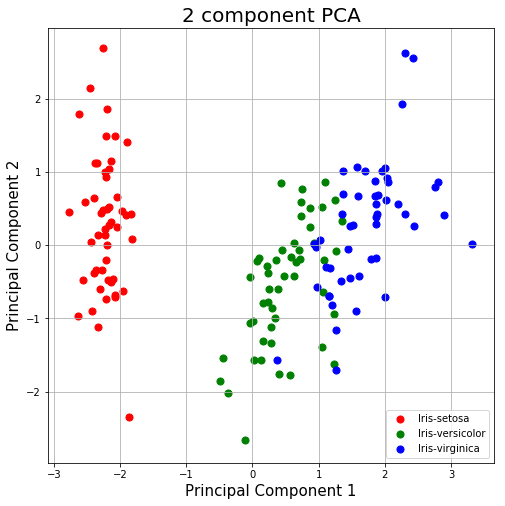

In [10]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color,s = 50)

ax.legend(target_names)
ax.grid()